In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#loading noaa data and skipping metadatarows
df_noaa_events= pd.read_csv('/content/events-US-1980-2024.csv',skiprows=2)
df_noaa_events

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2756.4,706.8,30
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2236.2,590.0,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40681.2,10020.0,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2076.4,572.0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1409.1,401.4,20
...,...,...,...,...,...,...,...
398,Hurricane Debby (August 2024),Tropical Cyclone,20240805,20240809,2476.0,2476.0,17
399,Hurricane Francine (September 2024),Tropical Cyclone,20240911,20240912,1291.0,1291.0,0
400,Hurricane Helene (September 2024),Tropical Cyclone,20240924,20240929,78721.0,78721.0,219
401,Hurricane Milton (October 2024),Tropical Cyclone,20241009,20241010,34250.0,34250.0,32


In [5]:
#header cleaning
df_noaa_events.columns = df_noaa_events.columns.str.strip().str.lower().str.replace(' ', '_')
df_noaa_events.columns

Index(['name', 'disaster', 'begin_date', 'end_date', 'cpi-adjusted_cost',
       'unadjusted_cost', 'deaths'],
      dtype='object')

In [8]:
#datetime cleaning
df_noaa_events['begin_date'] = pd.to_datetime(df_noaa_events['begin_date'], format='%Y%m%d', errors='coerce')
print("Begin dates cleaned")
print(df_noaa_events['begin_date'].head(5))

print("End dates cleaned")
df_noaa_events['end_date'] = pd.to_datetime(df_noaa_events['end_date'], format='%Y%m%d', errors='coerce')
print(df_noaa_events['end_date'].head(5))

Begin dates cleaned
0   1980-04-10
1   1980-08-07
2   1980-06-01
3   1981-01-12
4   1981-05-05
Name: begin_date, dtype: datetime64[ns]
End dates cleaned
0   1980-04-17
1   1980-08-11
2   1980-11-30
3   1981-01-14
4   1981-05-10
Name: end_date, dtype: datetime64[ns]


In [10]:
#cost and death cleaning
df_noaa_events['unadjusted_cost'] = pd.to_numeric(df_noaa_events['unadjusted_cost'], errors='coerce')
print("Cost cleaned")
print(df_noaa_events['unadjusted_cost'].head(5))

df_noaa_events['deaths'] = pd.to_numeric(df_noaa_events['deaths'], errors='coerce')
print("Deaths cleaned")
print(df_noaa_events['deaths'].head(5))

Cost cleaned
0      706.8
1      590.0
2    10020.0
3      572.0
4      401.4
Name: unadjusted_cost, dtype: float64
Deaths cleaned
0      30
1      13
2    1260
3       0
4      20
Name: deaths, dtype: int64


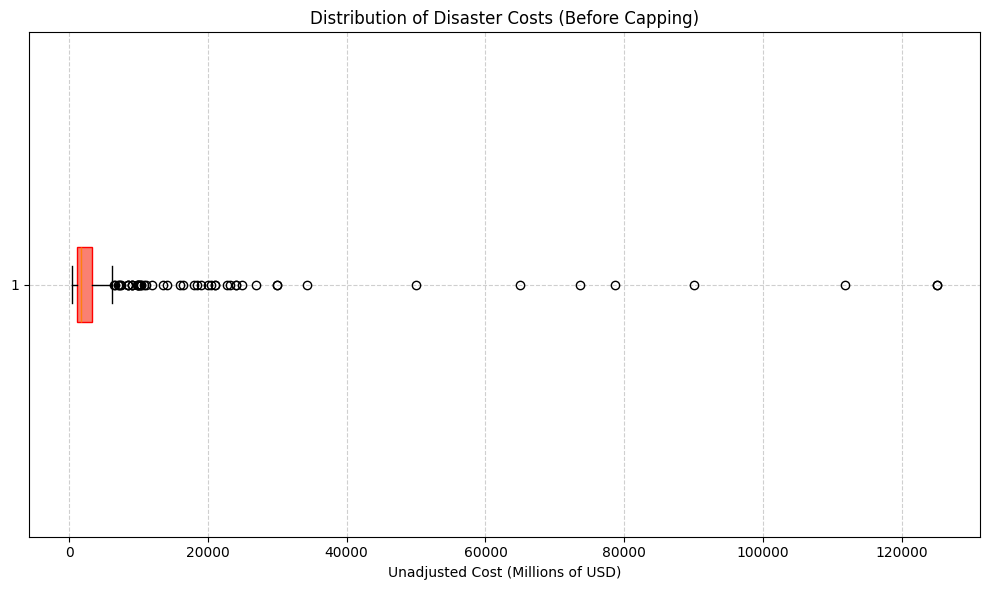

In [12]:
#checking for outliers in cost with box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_noaa_events['unadjusted_cost'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='salmon', color='red'))
plt.title('Distribution of Disaster Costs (Before Capping)')
plt.xlabel('Unadjusted Cost (Millions of USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('noaa_before_capping.png')

In [13]:
#capping the cost to upper bound
Q1 = df_noaa_events['unadjusted_cost'].quantile(0.25)
Q3 = df_noaa_events['unadjusted_cost'].quantile(0.75)
IQR = Q3 - Q1
upper_cap = Q3 + 1.5 * IQR

In [14]:
df_noaa_events['unadjusted_cost_capped'] = np.where(df_noaa_events['unadjusted_cost'] > upper_cap, upper_cap, df_noaa_events['unadjusted_cost'])
df_noaa_events['unadjusted_cost_capped'].head()

,unadjusted_cost_capped
0,706.8
1,590.0
2,6432.0
3,572.0
4,401.4


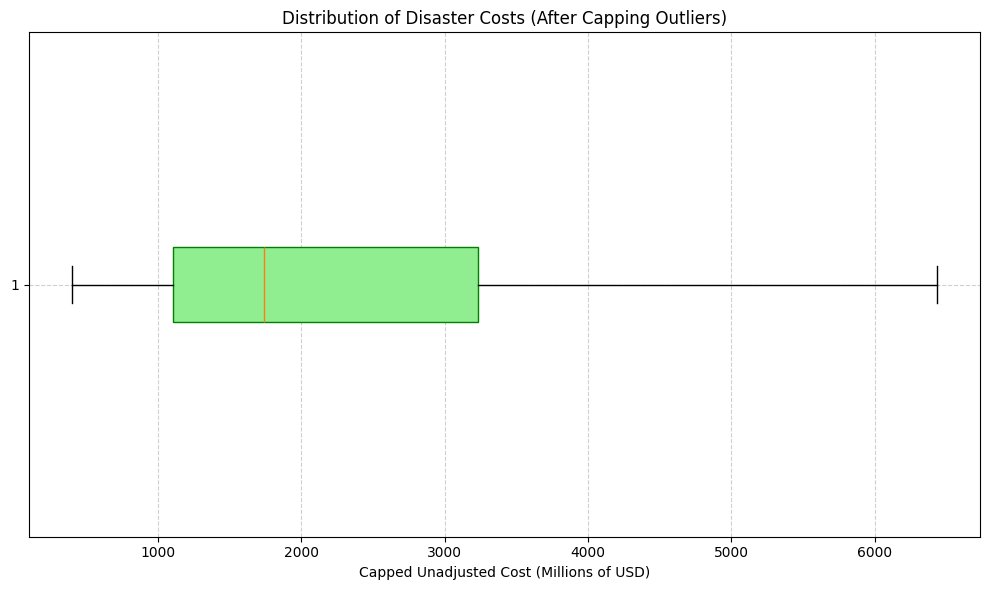

In [15]:
#normalized cost
plt.figure(figsize=(10, 6))
plt.boxplot(df_noaa_events['unadjusted_cost_capped'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
plt.title('Distribution of Disaster Costs (After Capping Outliers)')
plt.xlabel('Capped Unadjusted Cost (Millions of USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('noaa_after_capping.png')

In [16]:
#required feautures
required_features = [
    'begin_date',
    'disaster',
    'unadjusted_cost_capped',
    'deaths'
]

df_noaa_final = df_noaa_events[required_features]

In [17]:
df_noaa_final.head(15)

,begin_date,disaster,unadjusted_cost_capped,deaths
0,1980-04-10,Flooding,706.8,30
1,1980-08-07,Tropical Cyclone,590.0,13
2,1980-06-01,Drought,6432.0,1260
3,1981-01-12,Freeze,572.0,0
4,1981-05-05,Severe Storm,401.4,20
5,1982-01-08,Winter Storm,662.0,85
6,1982-04-02,Severe Storm,483.2,33
7,1982-05-31,Severe Storm,479.9,30
8,1982-12-01,Flooding,1536.1,45
9,1982-12-13,Flooding,1499.6,50


In [18]:
df_noaa_final.to_csv('cleaned_noaa_events.csv', index=False)